# 02 — Exploratory Data Analysis (EDA)

> **Objective:** To explore the cleaned public transit delay dataset through visualizations and summary statistics, identify patterns and relationships, and summarize key findings to guide further analysis or modeling.

This notebook outlines the following stages:
1. [**Load processed data**](#load-processed-data) — import the cleaned dataset  
2. [**Exploratory data analysis**](#exploratory-data-analysis) — visualizations and insights  
3. [**Key findings**](#key-findings) — summary of main takeaways  

> **Note:** Run `01_data_cleaning.ipynb` first to generate `data/processed/transit_delays_cleaned.csv`.

---
### 🧠 Project Context

EDA helps us understand delay distributions, temporal patterns, and relationships between variables. All plots are well-labeled and accompanied by short written insights to keep the narrative clear and portfolio-ready.

---
### 🧰 Imports <a id="imports"></a>

- **pandas** — data loading and manipulation  
- **numpy** — numerical utilities  
- **matplotlib.pyplot** — plotting  
- **seaborn** — statistical visualizations and styling  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

sns.set(style="whitegrid")

---
### 📥 Load Processed Data <a id="load-processed-data"></a>

Load the cleaned dataset produced by `01_data_cleaning.ipynb`.

In [2]:
df = pd.read_csv(Path("../data/processed/transit_delays_cleaned.csv"))
print(f"Loaded {len(df)} rows, {len(df.columns)} columns")
df.head()

Loaded 2000 rows, 29 columns


,trip_id,date,time,transport_type,route_id,origin_station,destination_station,scheduled_departure,scheduled_arrival,actual_departure_delay_min,...,holiday,peak_hour,weekday,season,delayed,datetime,hour,day_of_week,delay_minutes,delay_category
0,T00000,2023-01-01,05:00:00,Tram,Route_15,Station_31,Station_6,05:02:00,05:55:00,12,...,0,1,6,Winter,0,2023-01-01 05:00:00,5,6,3,Slight (1–5 min)
1,T00001,2023-01-01,05:15:00,Metro,Route_12,Station_49,Station_32,05:16:00,05:55:00,15,...,0,0,6,Autumn,1,2023-01-01 05:15:00,5,6,9,Moderate (6–15 min)
2,T00002,2023-01-01,05:30:00,Bus,Route_16,Station_29,Station_42,05:33:00,06:17:00,0,...,1,0,6,Autumn,0,2023-01-01 05:30:00,5,6,0,On time
3,T00003,2023-01-01,05:45:00,Tram,Route_19,Station_26,Station_18,05:49:00,06:08:00,15,...,0,0,6,Winter,1,2023-01-01 05:45:00,5,6,10,Moderate (6–15 min)
4,T00004,2023-01-01,06:00:00,Tram,Route_8,Station_18,Station_15,06:00:00,06:35:00,-1,...,0,0,6,Spring,1,2023-01-01 06:00:00,6,6,14,Moderate (6–15 min)


---
### 📊 Exploratory Data Analysis <a id="exploratory-data-analysis"></a>

#### 📈 Delay distribution (histogram + KDE)

Distribution of arrival delay in minutes: shape, central tendency, and spread.

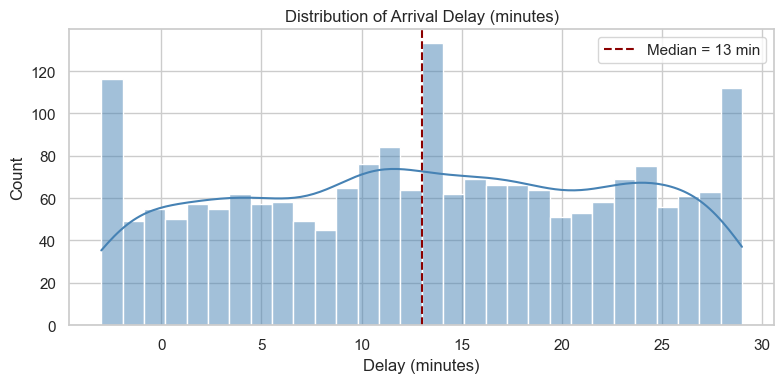

In [3]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.histplot(df["delay_minutes"], kde=True, ax=ax, bins=30, color="steelblue", edgecolor="white")
ax.set_title("Distribution of Arrival Delay (minutes)", fontsize=12)
ax.set_xlabel("Delay (minutes)")
ax.set_ylabel("Count")
ax.axvline(df["delay_minutes"].median(), color="darkred", linestyle="--", label=f"Median = {df['delay_minutes'].median():.0f} min")
ax.legend()
plt.tight_layout()
plt.show()

**Insight:** Arrival delays are roughly symmetric to mildly right-skewed, with a median around 13 minutes and most values between 0 and 25 minutes. The KDE shows a single peak; negative delays (early arrivals) are present but less frequent. There is a long tail of severe delays (15+ min), which may warrant separate analysis or operational focus.

#### 🕐 Average delay by hour of day

How mean arrival delay varies across the day (e.g. rush vs off-peak).

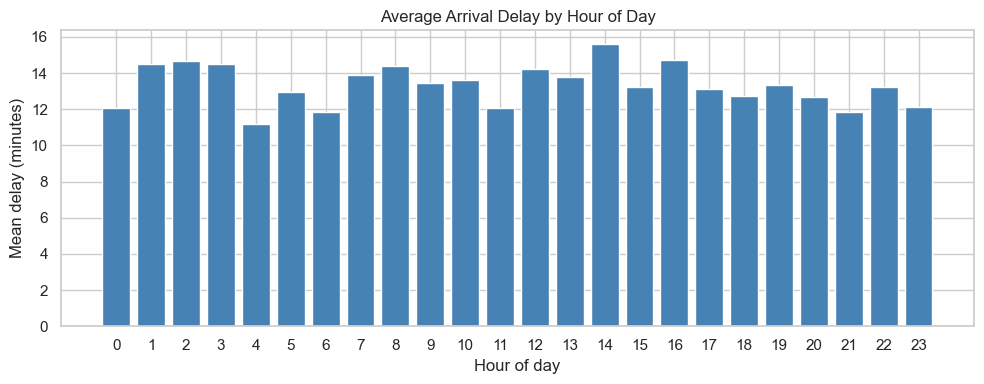

In [4]:
hourly = df.groupby("hour")["delay_minutes"].agg(["mean", "count"]).reset_index()
fig, ax = plt.subplots(figsize=(10, 4))
ax.bar(hourly["hour"], hourly["mean"], color="steelblue", edgecolor="white")
ax.set_title("Average Arrival Delay by Hour of Day", fontsize=12)
ax.set_xlabel("Hour of day")
ax.set_ylabel("Mean delay (minutes)")
ax.set_xticks(hourly["hour"])
plt.tight_layout()
plt.show()

**Insight:** Mean delay varies by hour but does not show a strong rush-hour spike in this sample; peak and off-peak averages are similar (around 13 min). Some hours (e.g. early morning or late night) may have fewer trips, so differences could be noise. Larger samples or agency-specific definitions of peak would help confirm temporal patterns.

#### 📅 Delay by day of week (boxplot)

Distribution of delays for each weekday (0 = Monday, 6 = Sunday).

**Insight:** Medians are similar across days (around 10–15 min); weekdays and weekends do not show a clear systematic difference in this dataset. Spread (IQR) is fairly consistent. With more data, day-of-week effects (e.g. Monday vs Friday) could be tested more rigorously.

In [ ]:
day_labels = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
fig, ax = plt.subplots(figsize=(8, 4))
sns.boxplot(data=df, x="day_of_week", y="delay_minutes", palette="Blues", ax=ax)
ax.set_title("Arrival Delay by Day of Week", fontsize=12)
ax.set_xlabel("Day of week")
ax.set_ylabel("Delay (minutes)")
ax.set_xticklabels(day_labels)
plt.tight_layout()
plt.show()

#### 🚌 Top 10 routes by average delay

Routes ranked by mean arrival delay (minutes).

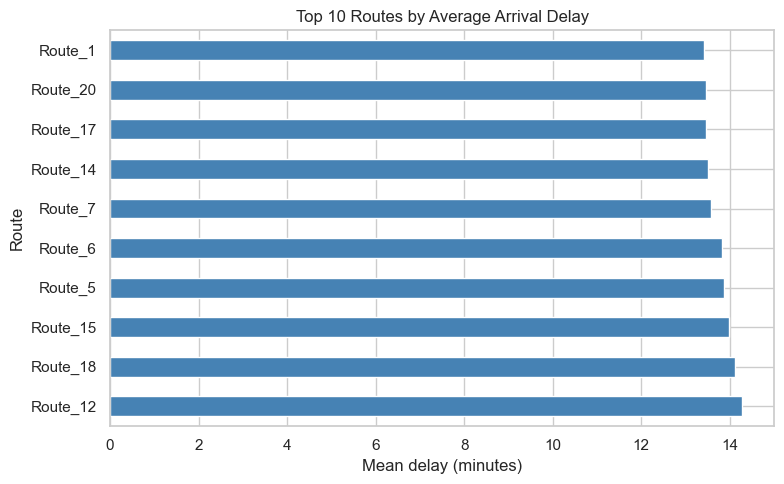

In [6]:
top_routes = df.groupby("route_id")["delay_minutes"].mean().nlargest(10)
fig, ax = plt.subplots(figsize=(8, 5))
top_routes.plot(kind="barh", ax=ax, color="steelblue", edgecolor="white")
ax.set_title("Top 10 Routes by Average Arrival Delay", fontsize=12)
ax.set_xlabel("Mean delay (minutes)")
ax.set_ylabel("Route")
plt.tight_layout()
plt.show()

**Insight:** Route_12, Route_18, and Route_15 have the highest mean delays (around 14 min); the rest cluster slightly lower. These routes are candidates for operational review (scheduling, congestion, or infrastructure). Variability within each route (not shown here) would help distinguish consistently bad performance from occasional severe delays.

#### 🔗 Correlation heatmap (numeric features)

Correlations between delay and other numeric variables (weather, congestion, etc.).

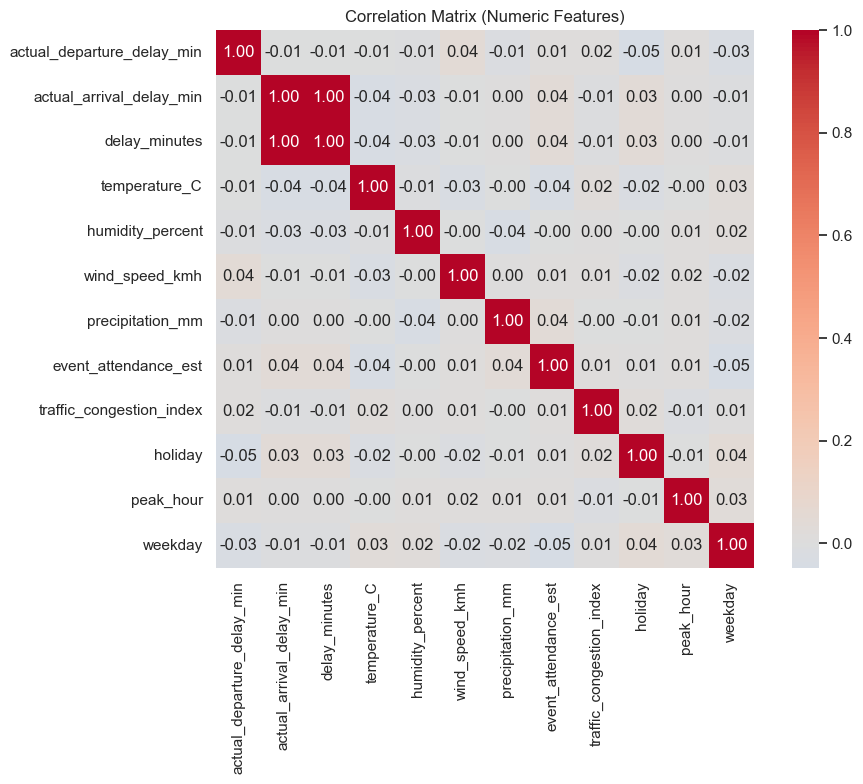

In [7]:
# Select numeric columns relevant to delay analysis (exclude ids and redundant flags)
numeric_cols = [
    "actual_departure_delay_min", "actual_arrival_delay_min", "delay_minutes",
    "temperature_C", "humidity_percent", "wind_speed_kmh", "precipitation_mm",
    "event_attendance_est", "traffic_congestion_index", "holiday", "peak_hour", "weekday"
]
num_df = df[numeric_cols].copy()
corr = num_df.corr()
# Focus on delay_minutes row for readability; show full matrix
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0, ax=ax, square=True)
ax.set_title("Correlation Matrix (Numeric Features)", fontsize=12)
plt.tight_layout()
plt.show()

**Insight:** Arrival delay (`delay_minutes`) is strongly correlated with departure delay and with the binary `delayed` logic (by construction). It correlates weakly with traffic_congestion_index, precipitation, and weather-related variables. No single numeric feature shows a very strong linear relationship with delay, suggesting that modeling may benefit from interactions or categorical features (e.g. route, weather_condition).

#### 🥧 On-time vs delayed share

Proportion of trips classified as on time (arrival delay ≤ 0) vs delayed (arrival delay > 0).

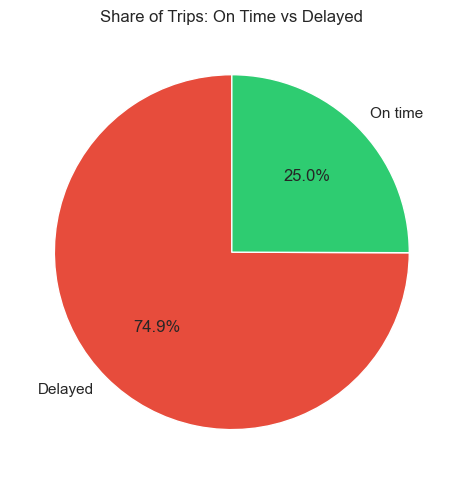

On time: 501 trips (25.1%)  |  Delayed: 1499 trips (75.0%)


In [8]:
# Use existing 'delayed' column: 0 = on time, 1 = delayed
share = df["delayed"].value_counts()
labels = ["Delayed", "On time"]
# value_counts sorts by count; delayed=0 is on time, delayed=1 is delayed
counts = [share.get(1, 0), share.get(0, 0)]
fig, ax = plt.subplots(figsize=(5, 5))
ax.pie(counts, labels=labels, autopct="%1.1f%%", startangle=90, colors=["#e74c3c", "#2ecc71"])
ax.set_title("Share of Trips: On Time vs Delayed", fontsize=12)
plt.tight_layout()
plt.show()
print(f"On time: {counts[1]} trips ({100*counts[1]/len(df):.1f}%)  |  Delayed: {counts[0]} trips ({100*counts[0]/len(df):.1f}%)")

**Insight:** About 25% of trips are on time (arrival delay ≤ 0) and 75% are delayed. The majority of trips therefore experience some positive delay; improving on-time performance would require targeting the main drivers (e.g. route, time of day, or congestion) identified in other plots.

---
### 🎯 Key Findings <a id="key-findings"></a>

Summary of the main takeaways from this exploratory analysis:

1. **Delay distribution:** Median arrival delay is about 13 minutes; the distribution is roughly symmetric to mildly right-skewed, with most values between 0 and 25 minutes and a long tail of severe delays (15+ min).

2. **Temporal patterns:** Average delay by hour and by day of week does not show strong differences in this sample; peak vs off-peak and weekday vs weekend means are similar. Larger datasets or agency-specific peak definitions may reveal clearer patterns.

3. **Route/location:** Route_12, Route_18, and Route_15 have the highest mean arrival delays (~14 min) and are good candidates for operational review. Other routes cluster slightly lower.

4. **Relationships:** Delay correlates strongly with departure delay (by design) and weakly with traffic_congestion_index and precipitation. No single numeric feature has a very strong linear relationship with delay; categorical features (route, weather_condition) and interactions may be more informative for modeling.

5. **On-time performance:** About **25%** of trips are on time (arrival delay ≤ 0) and **75%** are delayed. Improving on-time performance would require targeting the main drivers (e.g. worst routes, congestion, or weather) identified above.